# fitting models for pv with solar info -1

In [ ]:
# !

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 11:42:13,545] A new study created in memory with name: no-name-4abf821b-ffa0-4f02-8c1a-ad2116046001
[I 2023-08-29 11:42:20,520] Trial 0 finished with value: -80.20340794865936 and parameters: {'max_depth': 7, 'learning_rate': 0.05210690216296553, 'n_estimators': 261, 'min_child_weight': 7, 'gamma': 0.17403498338533255, 'subsample': 0.15924738781999423, 'colsample_bytree': 0.09107112349778117, 'reg_alpha': 0.06941101040313527, 'reg_lambda': 1.5301315672786199e-06}. Best is trial 0 with value: -80.20340794865936.
[I 2023-08-29 11:42:26,805] Trial 1 finished with value: -66.94506723583886 and parameters: {'max_depth': 6, 'learning_rate': 0.17915057414384278, 'n_estimators': 307, 'min_child_weight': 10, 'gamma': 0.014361605075402654, 'subsample': 0.1590894621039406, 'colsample_bytree': 0.23104290605785416, 'reg_alpha': 1.8755217432549852e-05, 'reg_lambda': 4.3590048529552635e-07}. Best is trial 1 with value: -66.94506723583886.
[I 2023-08-29 11:42:29,796] Trial 2 finished wit

Number of finished trials: 30
Best trial:
  Value: -45.59538032908985
  Params: 
    max_depth: 9
    learning_rate: 0.06087697047080058
    n_estimators: 225
    min_child_weight: 3
    gamma: 0.043705186415240536
    subsample: 0.6982612982122071
    colsample_bytree: 0.30556769991075117
    reg_alpha: 9.301163939337279e-06
    reg_lambda: 0.00197915152202423
mean_squared_error:29492.12
mean_absolute_error:83.28
percentage_error:inf%
feature_importance: [('temp_-1h', 3811.0), ('dayofmonth', 3468.0), ('RealPower_-1d_-1h', 3348.0), ('RealPower_-1d_1h', 3333.0), ('temp_-2h', 3277.0), ('RealPower_-3d_-1h', 3246.0), ('RealPower_-2d_0h', 3204.0), ('RealPower_-3d_0h', 3130.0), ('RealPower_-2d_1h', 2992.0), ('temp_-3h', 2900.0), ('RealPower_-1d_0h', 2873.0), ('solar_azimuth', 2711.0), ('RealPower_-2d_-1h', 2594.0), ('temp_min_-3h', 2425.0), ('temp_min_-1h', 2424.0), ('temp_max_-2h', 2275.0), ('temp_max_-3h', 2168.0), ('RealPower_-3d_1h', 2097.0), ('month', 1700.0), ('temp_max_-1h', 1669.0), 

l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:586: RuntimeWarning:

divide by zero encountered in divide



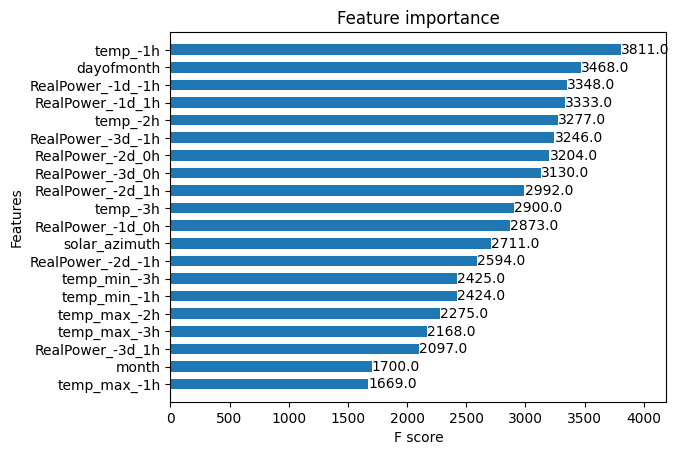

In [6]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['temp','temp_min','temp_max','clouds_all','weather_main'],
    'shift':[3,3,3,3,3] 
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_3h',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[1,0,-1],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':30,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_1',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,1],
        'min_child_weight':[1,10],
        'n_estimators':[5,500],
        'gamma':[0.01,1],
        'subsample':[0.01,1],
        'colsample_bytree':[0.01,1],
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
#case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

# fitting models for pv with solar info -2

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 13:23:07,599] A new study created in memory with name: no-name-89487f77-f29e-4169-a3e5-5c6e80233f5d
[I 2023-08-29 13:23:09,725] Trial 0 finished with value: -82.93057203518063 and parameters: {'max_depth': 2, 'learning_rate': 0.5255549423218475, 'n_estimators': 116, 'min_child_weight': 1, 'gamma': 0.02475446665633571, 'subsample': 0.17982962382566198, 'colsample_bytree': 0.4318921037750021, 'reg_alpha': 8.732472667612976e-05, 'reg_lambda': 0.0014687779761860507}. Best is trial 0 with value: -82.93057203518063.
[I 2023-08-29 13:23:11,524] Trial 1 finished with value: -147.3947789605885 and parameters: {'max_depth': 2, 'learning_rate': 0.038197339079170126, 'n_estimators': 71, 'min_child_weight': 4, 'gamma': 0.016961217037651004, 'subsample': 0.40979429078174884, 'colsample_bytree': 0.02538217304929596, 'reg_alpha': 0.04883763370036784, 'reg_lambda': 0.080085237408663}. Best is trial 0 with value: -82.93057203518063.
[I 2023-08-29 13:23:14,839] Trial 2 finished with value: 

Number of finished trials: 100
Best trial:
  Value: -46.71004459386435
  Params: 
    max_depth: 9
    learning_rate: 0.09473846057678705
    n_estimators: 492
    min_child_weight: 1
    gamma: 0.8333320392118214
    subsample: 0.8964366041467247
    colsample_bytree: 0.7537513388371654
    reg_alpha: 0.2161410109951546
    reg_lambda: 0.014664085348852631
mean_squared_error:30961.84
mean_absolute_error:83.79
percentage_error:inf%
feature_importance: [('dayofmonth', 15769.0), ('solar_zenith', 14410.0), ('solar_azimuth', 13386.0), ('RealPower_-1d_1h', 12064.0), ('RealPower_-3d_1h', 10142.0), ('RealPower_-1d_0h', 10102.0), ('RealPower_-2d_1h', 10047.0), ('hour', 9504.0), ('month', 8964.0), ('RealPower_-1d_-1h', 8809.0), ('RealPower_-3d_0h', 8344.0), ('RealPower_-2d_0h', 8306.0), ('RealPower_-2d_-1h', 8294.0), ('RealPower_-3d_-1h', 7920.0), ('quarter', 6112.0), ('clouds_all_-1h', 3319.0), ('clouds_all_-3h', 2567.0), ('clouds_all_-2h', 2555.0), ('weather_main_-1h', 2092.0), ('weather_main

l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:586: RuntimeWarning:

divide by zero encountered in divide



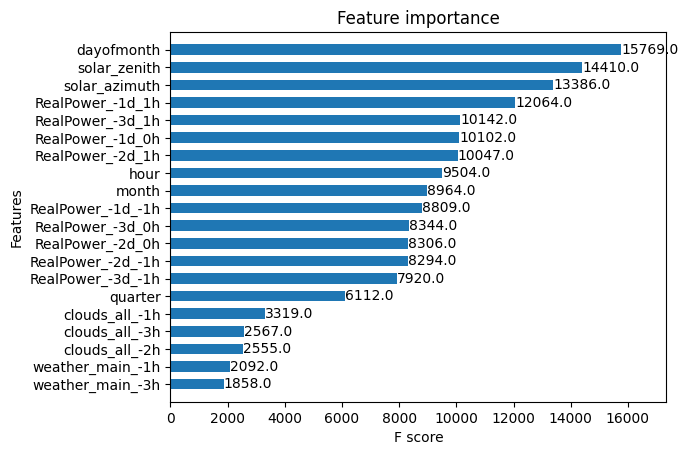

In [2]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3] 
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_3h_clouds-all_weather-main',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[1,0,-1],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':100,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_2_target_encode_3d_3h_clouds-all_weather-main',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,1],
        'min_child_weight':[1,10],
        'n_estimators':[5,500],
        'gamma':[0.01,1],
        'subsample':[0.01,1],
        'colsample_bytree':[0.01,1],
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 15:00:48,663] A new study created in memory with name: no-name-cae48d60-a908-42b0-9c3d-b644a34b87a2
[I 2023-08-29 15:00:56,013] Trial 0 finished with value: -92.87210603494925 and parameters: {'max_depth': 6, 'learning_rate': 0.6593081865135656, 'n_estimators': 272, 'min_child_weight': 2, 'gamma': 0.5892574714685008, 'subsample': 0.916519070623498, 'colsample_bytree': 0.025432669814983305, 'reg_alpha': 1.0871699124321343e-08, 'reg_lambda': 0.001968737477494228}. Best is trial 0 with value: -92.87210603494925.
[I 2023-08-29 15:00:59,899] Trial 1 finished with value: -97.88757693483154 and parameters: {'max_depth': 3, 'learning_rate': 0.9799157763200369, 'n_estimators': 179, 'min_child_weight': 8, 'gamma': 0.5715833367387174, 'subsample': 0.45419017970886694, 'colsample_bytree': 0.09411511626842105, 'reg_alpha': 0.0008527109594239077, 'reg_lambda': 0.0003076953619593811}. Best is trial 0 with value: -92.87210603494925.
[I 2023-08-29 15:01:02,378] Trial 2 finished with value

Number of finished trials: 70
Best trial:
  Value: -9.967851265778524
  Params: 
    max_depth: 10
    learning_rate: 0.16385450671531818
    n_estimators: 307
    min_child_weight: 9
    gamma: 0.30921809855043997
    subsample: 0.9842358543630486
    colsample_bytree: 0.9976247028874272
    reg_alpha: 6.659081158545084e-08
    reg_lambda: 0.04502158429849898
mean_squared_error:31354.77
mean_absolute_error:83.97
percentage_error:inf%
feature_importance: [('dayofmonth', 10859.0), ('solar_zenith', 10460.0), ('solar_azimuth', 9972.0), ('RealPower_-1d_1h', 9453.0), ('RealPower_-1d_0h', 9021.0), ('RealPower_-3d_1h', 8995.0), ('RealPower_-2d_1h', 8641.0), ('RealPower_-1d_-1h', 8507.0), ('RealPower_-2d_-1h', 8394.0), ('RealPower_-3d_0h', 8247.0), ('RealPower_-2d_0h', 8192.0), ('RealPower_-3d_-1h', 8059.0), ('month', 5098.0), ('clouds_all_-1h', 3792.0), ('clouds_all_-3h', 2916.0), ('hour', 2714.0), ('quarter', 2664.0), ('weather_main_-1h', 2533.0), ('weather_main_-3h', 1984.0), ('clouds_all_-

l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:647: RuntimeWarning:

divide by zero encountered in divide



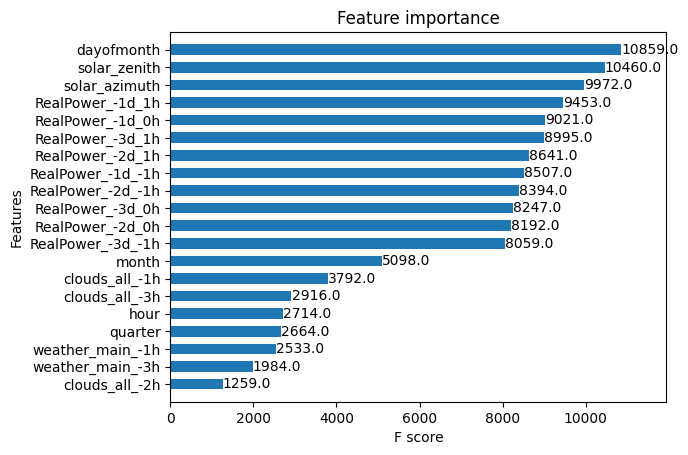

In [3]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'split_date':'01-Jan-2019',
    'target_encode_keys':['clouds_all','weather_main'],
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_3h_clouds-all_weather-main_all-target',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[1,0,-1],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':100,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_2_target_encode_3d_3h_clouds-all_weather-main_all-target',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,1],
        'min_child_weight':[1,10],
        'n_estimators':[5,500],
        'gamma':[0.01,1],
        'subsample':[0.01,1],
        'colsample_bytree':[0.01,1],
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 16:00:39,546] A new study created in memory with name: no-name-ca5d4e3b-e5c4-4c23-b2f6-0a3d6f3c0177
[I 2023-08-29 16:00:42,226] Trial 0 finished with value: -7.988995845059609e+35 and parameters: {'max_depth': 3, 'learning_rate': 2.860320299624265, 'n_estimators': 195, 'min_child_weight': 5, 'gamma': 0.7813128198684952, 'subsample': 0.0030747966930076364, 'colsample_bytree': 0.06661918242864592, 'reg_alpha': 0.6382946199170181, 'reg_lambda': 0.01914409259020524}. Best is trial 0 with value: -7.988995845059609e+35.
[I 2023-08-29 16:00:45,271] Trial 1 finished with value: -53727.079557036675 and parameters: {'max_depth': 4, 'learning_rate': 1.8147731703139602, 'n_estimators': 131, 'min_child_weight': 5, 'gamma': 0.5983031612701407, 'subsample': 0.002735653472722698, 'colsample_bytree': 0.0820345441709411, 'reg_alpha': 1.6256413154012376e-06, 'reg_lambda': 0.011263429802065622}. Best is trial 1 with value: -53727.079557036675.
[I 2023-08-29 16:00:49,831] Trial 2 finished wit

Number of finished trials: 30
Best trial:
  Value: -100.25776696748474
  Params: 
    max_depth: 1
    learning_rate: 0.5856394212309137
    n_estimators: 329
    min_child_weight: 7
    gamma: 0.5168098137766128
    subsample: 0.009409190567758532
    colsample_bytree: 0.01278988886507537
    reg_alpha: 9.241612136166406e-05
    reg_lambda: 0.12138819498398741
mean_squared_error:35222.50
mean_absolute_error:110.52
percentage_error:inf%
feature_importance: [('hour', 30.0), ('RealPower_-2d_0h', 28.0), ('weather_main_-3h', 26.0), ('clouds_all_-1h', 25.0), ('dayofmonth', 24.0), ('RealPower_-1d_0h', 24.0), ('clouds_all_-3h', 24.0), ('solar_azimuth', 23.0), ('weather_main_-2h', 23.0), ('clouds_all_-2h', 23.0), ('RealPower_-3d_0h', 21.0), ('quarter', 20.0), ('month', 20.0), ('weather_main_-1h', 18.0)]


l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:647: RuntimeWarning:

divide by zero encountered in divide



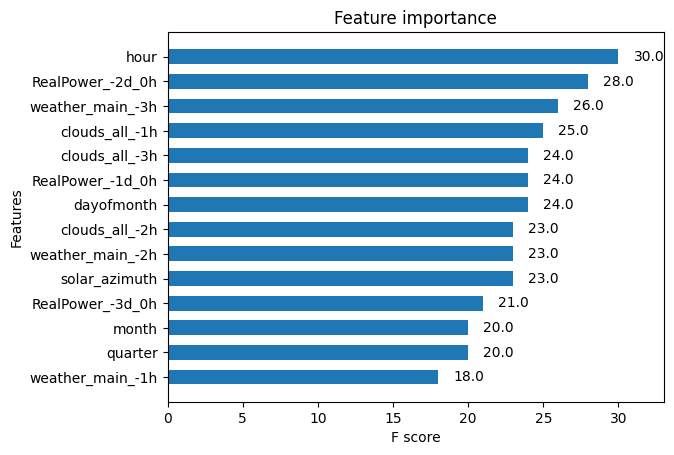

In [10]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'split_date':'01-Jan-2019',
    'target_encode_keys':['clouds_all','weather_main'],
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_0h_clouds-all_weather-main_all-target',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[0],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':30,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_5_target_encode_3d_0h_clouds-all_weather-main_all-target',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,5],
        'learning_rate':[0.5,1], # lower to avoid overfitting [0.01,1]
        'min_child_weight':[5,10], # larger to avoid overfitting [1,10]
        'n_estimators':[5,500],
        'gamma':[0.5,1], # larger to avoid overfitting [0.01,1]
        'subsample':[0.001,0.01], # lower to avoid overfitting [0.01,1]
        'colsample_bytree':[0.01,0.1], # lower to avoid overfitting [0.01,1]
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 16:10:57,129] A new study created in memory with name: no-name-c2dcec62-e594-414c-9202-22da67ba1b0a
[I 2023-08-29 16:10:58,557] Trial 0 finished with value: -153.42840596171138 and parameters: {'max_depth': 2, 'learning_rate': 0.3269243726506647, 'n_estimators': 10, 'min_child_weight': 10, 'gamma': 0.5512771418870311, 'subsample': 0.0022787899576603428, 'colsample_bytree': 0.00022893899760648465, 'reg_alpha': 0.00026614234499558616, 'reg_lambda': 0.002652793085554522}. Best is trial 0 with value: -153.42840596171138.
[I 2023-08-29 16:11:06,294] Trial 1 finished with value: -105.00176223788571 and parameters: {'max_depth': 4, 'learning_rate': 0.302215216512888, 'n_estimators': 483, 'min_child_weight': 7, 'gamma': 0.6355198901789506, 'subsample': 0.006800670224900448, 'colsample_bytree': 0.000571600577691155, 'reg_alpha': 0.2240649936314327, 'reg_lambda': 0.002232656103934268}. Best is trial 1 with value: -105.00176223788571.
[I 2023-08-29 16:11:09,426] Trial 2 finished wit

Number of finished trials: 100
Best trial:
  Value: -94.74775763343048
  Params: 
    max_depth: 3
    learning_rate: 0.10014988998384869
    n_estimators: 117
    min_child_weight: 10
    gamma: 0.9801733500018054
    subsample: 0.009998522986469225
    colsample_bytree: 0.00016026703777092098
    reg_alpha: 1.782026031920921e-05
    reg_lambda: 1.0143441303207207e-06
mean_squared_error:33896.47
mean_absolute_error:102.73
percentage_error:inf%
feature_importance: [('RealPower_-2d_0h', 82.0), ('RealPower_-1d_0h', 80.0), ('solar_azimuth', 66.0), ('RealPower_-3d_0h', 62.0), ('hour', 60.0), ('dayofmonth', 47.0), ('weather_main_-2h', 36.0), ('clouds_all_-2h', 33.0), ('clouds_all_-3h', 33.0), ('clouds_all_-1h', 29.0), ('month', 25.0), ('weather_main_-1h', 23.0), ('weather_main_-3h', 17.0), ('quarter', 15.0)]


l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:647: RuntimeWarning:

divide by zero encountered in divide



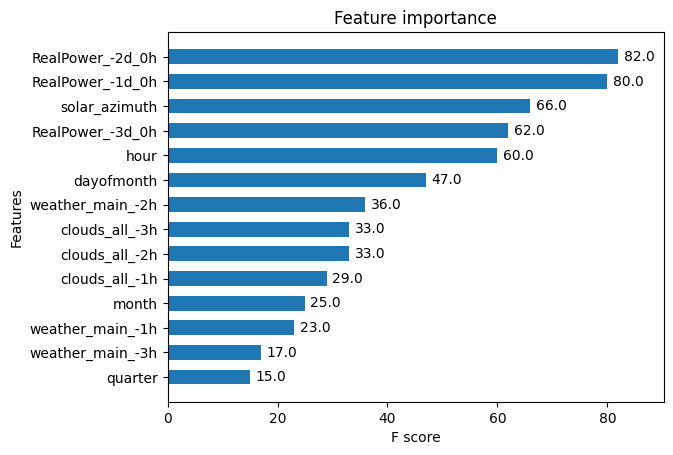

In [13]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'split_date':'01-Jan-2019',
    'target_encode_keys':['clouds_all','weather_main'],
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_0h_clouds-all_weather-main_all-target',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[0],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':100,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_6_target_encode_3d_0h_clouds-all_weather-main_all-target',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.1,0.5], # lower to avoid overfitting [0.01,1]
        'min_child_weight':[5,10], # larger to avoid overfitting [1,10]
        'n_estimators':[5,500],
        'gamma':[0.5,1], # larger to avoid overfitting [0.01,1]
        'subsample':[0.001,0.01], # lower to avoid overfitting [0.01,1]
        'colsample_bytree':[0.0001,0.001], # lower to avoid overfitting [0.01,1]
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 16:16:33,959] A new study created in memory with name: no-name-0e5be334-c933-4f9d-a2d2-7c0e984c0253
[I 2023-08-29 16:16:40,184] Trial 0 finished with value: -96.48368985981816 and parameters: {'max_depth': 3, 'learning_rate': 0.04718659878150858, 'n_estimators': 433, 'min_child_weight': 5, 'gamma': 0.8832362723282013, 'subsample': 0.0025316234052434293, 'colsample_bytree': 0.00017706161906480656, 'reg_alpha': 5.51923164898439e-07, 'reg_lambda': 3.085378608365481e-06}. Best is trial 0 with value: -96.48368985981816.
[I 2023-08-29 16:16:45,854] Trial 1 finished with value: -134.2655171429953 and parameters: {'max_depth': 6, 'learning_rate': 0.018029258396750292, 'n_estimators': 238, 'min_child_weight': 9, 'gamma': 0.7312306931058464, 'subsample': 0.0025797606926889678, 'colsample_bytree': 0.00018741688066261256, 'reg_alpha': 0.030126426023141355, 'reg_lambda': 0.011030822564259904}. Best is trial 0 with value: -96.48368985981816.
[I 2023-08-29 16:16:56,265] Trial 2 finished

Number of finished trials: 100
Best trial:
  Value: -94.6362646580173
  Params: 
    max_depth: 6
    learning_rate: 0.050190516885897485
    n_estimators: 287
    min_child_weight: 9
    gamma: 0.5975689731832124
    subsample: 0.008664182886799252
    colsample_bytree: 0.00010559836786799808
    reg_alpha: 1.4995336864742096e-07
    reg_lambda: 0.06918130041028536
mean_squared_error:33274.40
mean_absolute_error:102.80
percentage_error:inf%
feature_importance: [('RealPower_-2d_0h', 613.0), ('RealPower_-1d_0h', 576.0), ('solar_azimuth', 473.0), ('RealPower_-3d_0h', 469.0), ('hour', 366.0), ('dayofmonth', 334.0), ('month', 198.0), ('weather_main_-2h', 93.0), ('weather_main_-3h', 92.0), ('clouds_all_-3h', 85.0), ('clouds_all_-2h', 83.0), ('clouds_all_-1h', 80.0), ('weather_main_-1h', 66.0), ('quarter', 54.0)]


l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:647: RuntimeWarning:

divide by zero encountered in divide



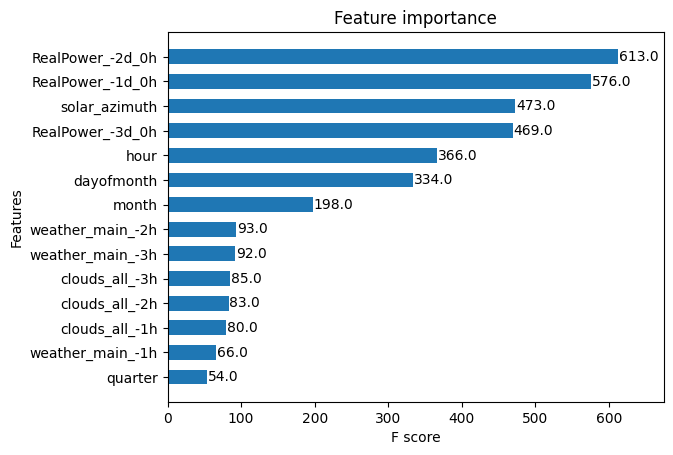

In [14]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'split_date':'01-Jan-2019',
    'target_encode_keys':['clouds_all','weather_main'],
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_0h_clouds-all_weather-main_all-target',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[0],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':100,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_7_target_encode_3d_0h_clouds-all_weather-main_all-target',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,0.1], # lower to avoid overfitting [0.01,1]
        'min_child_weight':[5,10], # larger to avoid overfitting [1,10]
        'n_estimators':[5,500],
        'gamma':[0.5,1], # larger to avoid overfitting [0.01,1]
        'subsample':[0.001,0.01], # lower to avoid overfitting [0.01,1]
        'colsample_bytree':[0.0001,0.001], # lower to avoid overfitting [0.01,1]
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()

**************************************************
Fitting model for: pv
**************************************************


[I 2023-08-29 16:27:21,393] A new study created in memory with name: no-name-5ded0cbf-c33d-482d-9f64-31ffe48bee15
[I 2023-08-29 16:27:22,797] Trial 0 finished with value: -194.22209160995394 and parameters: {'max_depth': 3, 'learning_rate': 0.032627655936198444, 'n_estimators': 34, 'min_child_weight': 9, 'gamma': 0.7716954697267554, 'subsample': 0.0023619093340076823, 'colsample_bytree': 0.006996737477773456, 'reg_alpha': 7.314727089242996e-05, 'reg_lambda': 0.0012906579904888773}. Best is trial 0 with value: -194.22209160995394.
[I 2023-08-29 16:27:26,526] Trial 1 finished with value: -128.55883226600048 and parameters: {'max_depth': 3, 'learning_rate': 0.014868748128555338, 'n_estimators': 263, 'min_child_weight': 9, 'gamma': 0.671932148235747, 'subsample': 0.0037774373259477786, 'colsample_bytree': 0.0021922929452119883, 'reg_alpha': 0.0017825083271843295, 'reg_lambda': 0.07800547866618147}. Best is trial 1 with value: -128.55883226600048.
[I 2023-08-29 16:27:31,668] Trial 2 finishe

Number of finished trials: 100
Best trial:
  Value: -96.09265420445544
  Params: 
    max_depth: 8
    learning_rate: 0.029631933964293887
    n_estimators: 473
    min_child_weight: 9
    gamma: 0.6008954501872459
    subsample: 0.005914885469289961
    colsample_bytree: 0.002326050509509728
    reg_alpha: 0.00713601658208403
    reg_lambda: 2.858931202812025e-06
mean_squared_error:34038.07
mean_absolute_error:104.87
percentage_error:inf%
feature_importance: [('dayofmonth', 1448.0), ('RealPower_-2d_0h', 1221.0), ('RealPower_-3d_0h', 1157.0), ('RealPower_-1d_0h', 1150.0), ('solar_azimuth', 1115.0), ('hour', 753.0), ('month', 538.0), ('weather_main_-1h', 181.0), ('clouds_all_-1h', 175.0), ('quarter', 126.0)]


l:\Coding_project\Energy_grid_new\notebooks\XGBoost_helper.py:647: RuntimeWarning:

divide by zero encountered in divide



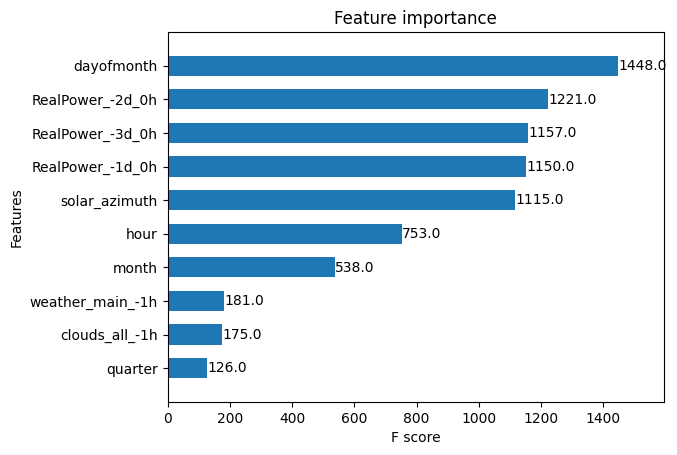

In [16]:
from XGBoost_helper import Data_encoder,Optuna_core,XGBoost_Optuna,Simple_forecast, intersection_sum

weather_setting_={
    'weather_fn':r'L:/Coding_project/Energy_grid_new/data/UCSD_raw_data/Weather_SanDiego.csv',
    'keys':['clouds_all','weather_main'],
    'shift':[3,3],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'split_date':'01-Jan-2019',
    'target_encode_keys':['clouds_all','weather_main'],
} 
data_setting_={
    'load_from_existing_file':True,
    'data_fn':'sum_real',
    'src_path':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/pv_load_origin/',
    'save_prefix':'target_encode_3d_0h_clouds-all_weather-main_all-target_1h',
    'save_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'days_ahead':[1,2,3],
    'hours_ahead':[0],
    'enable_target_encoding':True, 
    'target_encoding_start':'01-Jan-2017',
    'load_type':'PV',
    'split_date':'01-Jan-2019'
}


model_setting_={
    'n_trials':100,
    'metrics':'neg_mean_absolute_error',
    'stop_threshold':-10,
    'model_folder':r'L:/Coding_project/Energy_grid_new/XGBoost_pred/model/',
    'save_prefix':'0829_pv_7_target_encode_3d_0h_clouds-all_weather-main_all-target_1h',
    'visualization_types':['optimization_history','contour','slice'],
    'params':{
        'max_depth':[1,10],
        'learning_rate':[0.01,0.1], # lower to avoid overfitting [0.01,1]
        'min_child_weight':[5,10], # larger to avoid overfitting [1,10]
        'n_estimators':[5,500],
        'gamma':[0.5,1], # larger to avoid overfitting [0.01,1]
        'subsample':[0.001,0.01], # lower to avoid overfitting [0.01,1]
        'colsample_bytree':[0.001,0.01], # lower to avoid overfitting [0.01,1]
        'reg_alpha':[1e-8,1],
        'reg_lambda':[1e-8,1],
    }
}


print('*'*50)
print('Fitting model for: pv')
print('*'*50)
case=XGBoost_Optuna(data_setting_=data_setting_,
                    weather_setting_=weather_setting_,
                    model_setting_=model_setting_,
                    )
case.optuna_optimizer()
case.optuna_visualization()
case.refit_best_trail()
case.predict_n_evaluate()
case.save_model()